### EDA

### import libraries

In [2]:
import sys
import pandas as pd
sys.path.append('../scripts')
from data_preprocessing import load_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging



### Set Up the Environment

In [3]:
# Initialize logger
logging.basicConfig(filename='../logs/exploration.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
test_file_path = '../data/test.csv'
train_file_path = '../data/train.csv'
store_file_path = '../data/store.csv'

In [5]:
test_df=load_data(test_file_path)
train_df=load_data(train_file_path)
store_df=load_data(store_file_path)

c:\Users\zelalem.wubet\projects\personal\ten-academy\Sales_Forcasting_Rossmann_Pharmaceuticals\notebooks\../scripts\data_preprocessing.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [6]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
train_df  = train_df.merge(store_df, how='left', on='Store')
train_df 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
test_df = test_df.merge(store_df, how='left', on='Store')
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
train_df['Date'] = pd.to_datetime(train_df.Date)

In [12]:
test_df['Date'] = pd.to_datetime(test_df.Date)

### Exploratory Data Analysis (EDA)

#### Check the Distribution of Promotions

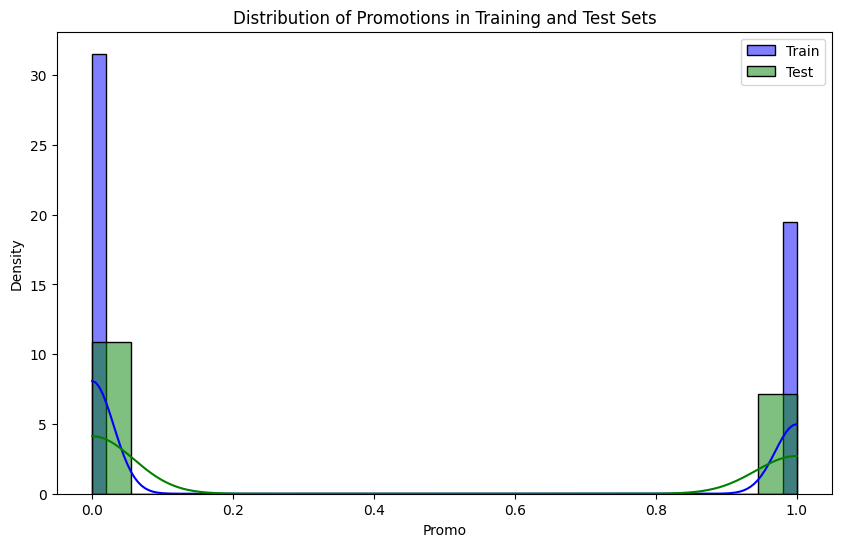

In [13]:
logging.info('Checking the distribution of promotions in training and test sets...')

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Promo'], label='Train', color='blue', kde=True, stat="density")
sns.histplot(test_df['Promo'], label='Test', color='green', kde=True, stat="density")
plt.title('Distribution of Promotions in Training and Test Sets')
plt.legend()
plt.show()

logging.info('Distribution of promotions visualized.')


#### Sales Behavior Around Holidays
Analyze how sales behavior changes before, during, and after holidays.

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_24016\3287385484.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_df, x='Date', y='Sales', hue='IsHoliday', ci=None)


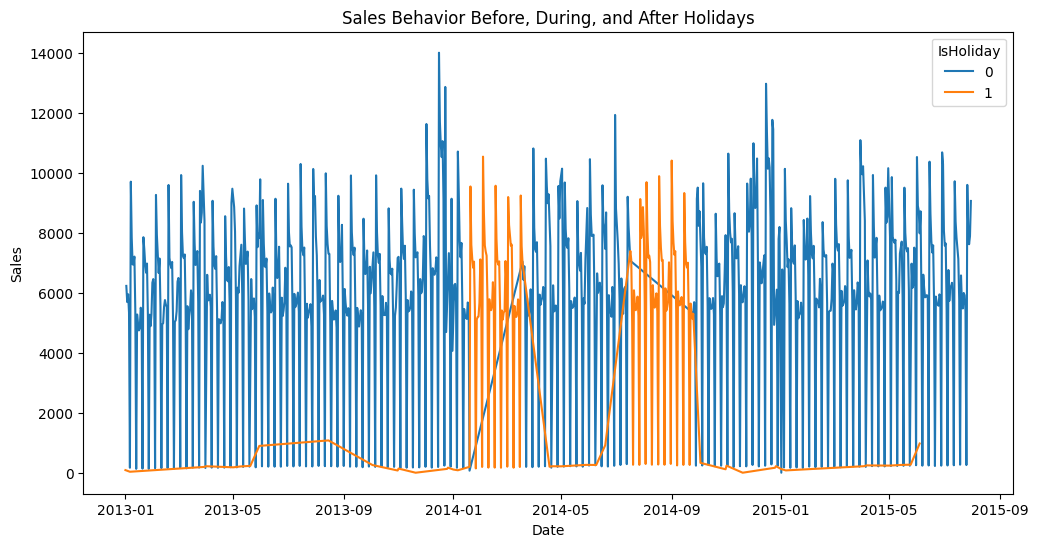

In [14]:
logging.info('Analyzing sales behavior around holidays...')

# Create a column for holidays
train_df['IsHoliday'] = np.where(train_df['StateHoliday'] != '0', 1, 0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=train_df, x='Date', y='Sales', hue='IsHoliday', ci=None)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()

logging.info('Sales behavior around holidays visualized.')


#### Seasonal Purchasing Behavior (Christmas, Easter, etc.)
Explore seasonal behaviors such as Christmas and Easter.

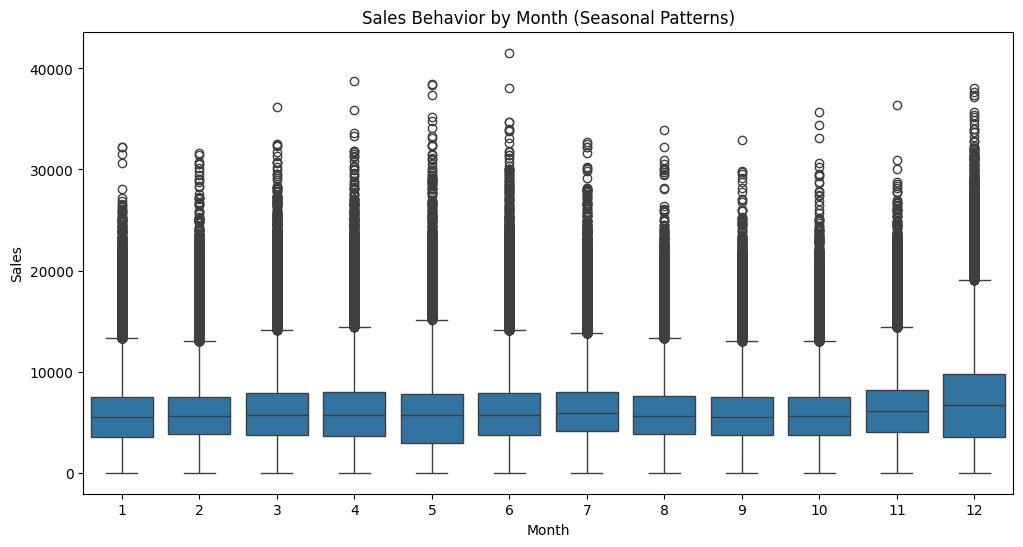

In [15]:
logging.info('Exploring seasonal purchasing behavior (e.g., Christmas)...')

# Extract month to check for Christmas (December) and Easter (April)
train_df['Month'] = pd.to_datetime(train_df['Date']).dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Month', y='Sales')
plt.title('Sales Behavior by Month (Seasonal Patterns)')
plt.show()

logging.info('Seasonal purchasing behavior visualized.')


#### Correlation Between Sales and Number of Customers

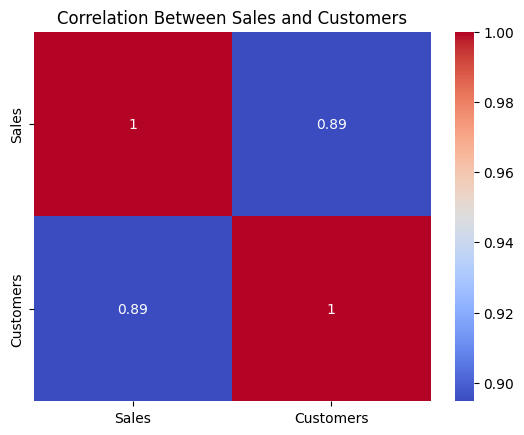

In [16]:
logging.info('Analyzing the correlation between sales and number of customers...')

correlation = train_df[['Sales', 'Customers']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales and Customers')
plt.show()

logging.info(f'Correlation matrix between sales and customers: {correlation}')


In [17]:
plt.figure(figsize=(18,8))
temp_df = train_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

#### Effect of Promotions on Sales and Customer Attraction
Analyze how promotions impact sales and customer behavior.

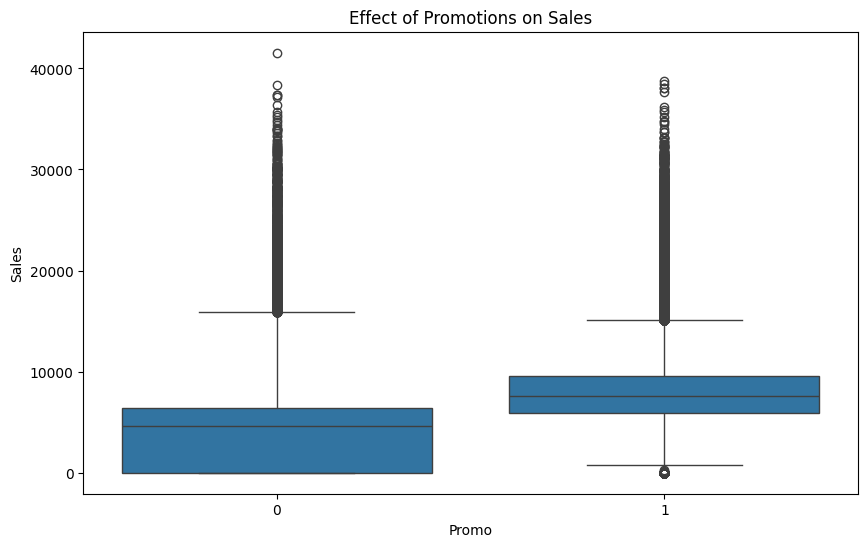

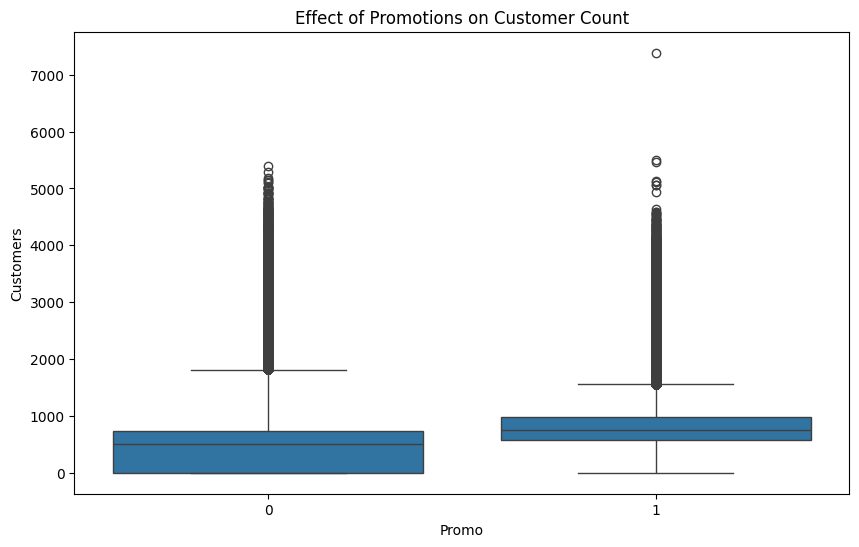

In [20]:
logging.info('Analyzing the effect of promotions on sales and customers...')

# Compare sales with and without promotions
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Promo', y='Sales')
plt.title('Effect of Promotions on Sales')
plt.show()

# Check customer count when promotion is on/off
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Promo', y='Customers')
plt.title('Effect of Promotions on Customer Count')
plt.show()

logging.info('Effect of promotions on sales and customer behavior visualized.')


<Axes: xlabel='Promo', ylabel='Sales'>

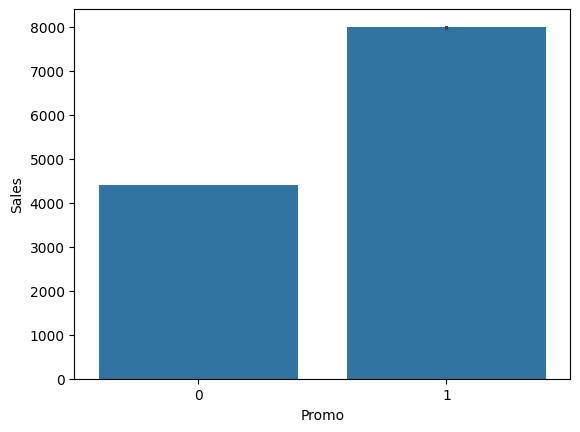

In [21]:
sns.barplot(data=train_df, x='Promo', y='Sales')

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [22]:
logging.info('Analyzing the effect of promos across different stores...')

# Group by store and promo, then calculate the mean sales
promo_effect = train_df.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()

# Calculate the percentage increase in sales due to promos
promo_effect['Sales_Increase'] = ((promo_effect[1] - promo_effect[0]) / promo_effect[0]) * 100

# Sort stores by the sales increase due to promotions
promo_effect = promo_effect.sort_values('Sales_Increase', ascending=False)

# Display top 10 stores with the highest sales increase due to promos
logging.info('Displaying top 10 stores with the highest sales increase due to promos:')
logging.info(promo_effect.head(10))
print(promo_effect.head(10))


Promo                0             1  Sales_Increase
StoreType                                           
a          4300.418175   8068.080939       87.611544
d          4326.661817   7776.593414       79.736567
c          4435.040156   7810.174738       76.101556
b          9409.434791  11109.739497       18.070211


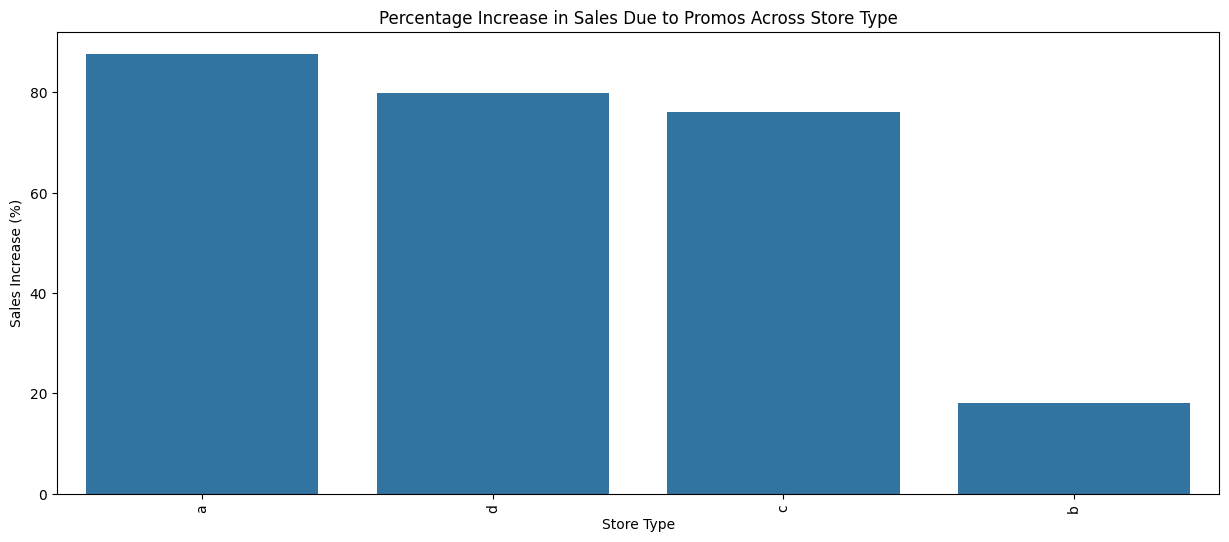

In [23]:
logging.info('Visualizing sales increase due to promos across different stores...')

plt.figure(figsize=(15, 6))
sns.barplot(x=promo_effect.index, y='Sales_Increase', data=promo_effect)
plt.title('Percentage Increase in Sales Due to Promos Across Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales Increase (%)')
plt.xticks(rotation=90)
plt.show()

logging.info('Sales increase visualization completed.')


#### Effect of Assortment Type on Promo Effectiveness

Promo                 0            1  Sales_Increase
Assortment                                          
a           4113.478647  7699.279197       87.171974
b           8316.314158  8938.803853        7.485163
c           4670.936606  8306.944249       77.843224


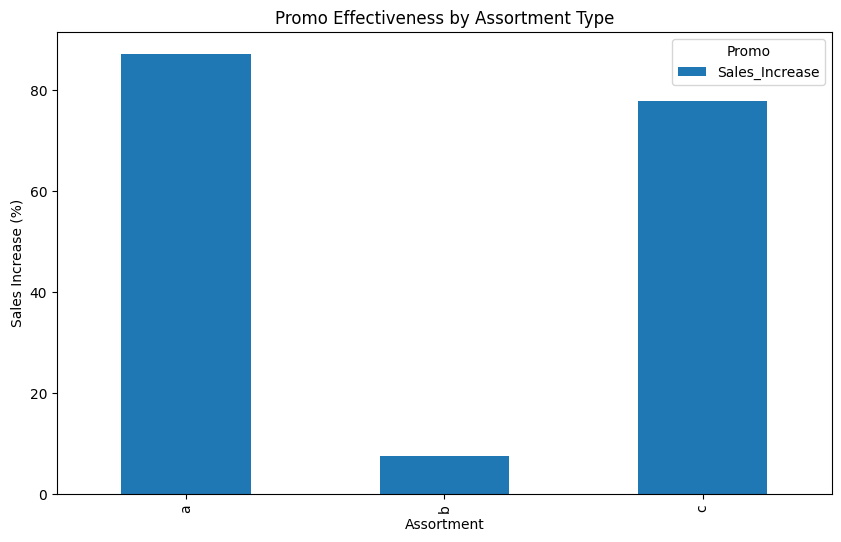

In [28]:
logging.info('Analyzing how assortment type affects promo effectiveness...')

# Group by assortment type and promo, then calculate mean sales
assortment_promo_effect = train_df.groupby(['Assortment', 'Promo'])['Sales'].mean().unstack()

# Calculate sales increase percentage
assortment_promo_effect['Sales_Increase'] = ((assortment_promo_effect[1] - assortment_promo_effect[0]) / assortment_promo_effect[0]) * 100

# Display results
logging.info('Displaying promo effectiveness based on assortment type:')
logging.info(assortment_promo_effect)
print(assortment_promo_effect)

# Plot promo effectiveness for assortment types
assortment_promo_effect[['Sales_Increase']].plot(kind='bar', figsize=(10, 6), title='Promo Effectiveness by Assortment Type')
plt.ylabel('Sales Increase (%)')
plt.show()

logging.info('Promo effectiveness by assortment type visualized.')


#### Effect of Competitor Distance on Promo Effectiveness

Promo                              0            1  Sales_Increase
CompetitionDistance_Bin                                          
<2km                     4621.127522  8253.781773       78.609695
2-5km                    4205.985394  7676.354284       82.510246
5-10km                   4260.471198  7687.137637       80.429283
>10km                    4251.330254  8009.907290       88.409434


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_22692\1472064783.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_distance_promo_effect = train_df.groupby(['CompetitionDistance_Bin', 'Promo'])['Sales'].mean().unstack()


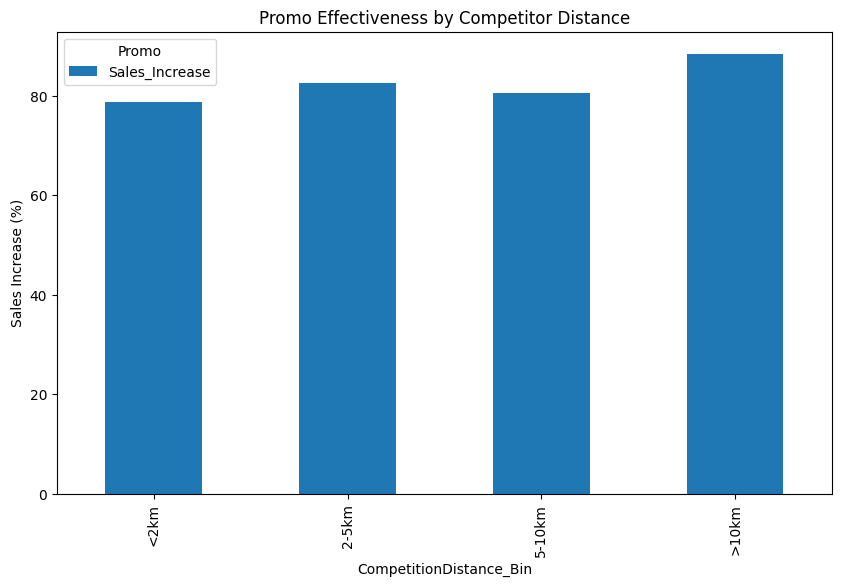

In [29]:
logging.info('Analyzing how competitor distance affects promo effectiveness...')

# Bin the competition distance into categories for easier analysis
train_df['CompetitionDistance_Bin'] = pd.cut(train_df['CompetitionDistance'], bins=[0, 2000, 5000, 10000, np.inf], labels=['<2km', '2-5km', '5-10km', '>10km'])

# Group by competition distance bin and promo, then calculate mean sales
comp_distance_promo_effect = train_df.groupby(['CompetitionDistance_Bin', 'Promo'])['Sales'].mean().unstack()

# Calculate sales increase percentage
comp_distance_promo_effect['Sales_Increase'] = ((comp_distance_promo_effect[1] - comp_distance_promo_effect[0]) / comp_distance_promo_effect[0]) * 100

# Display results
logging.info('Displaying promo effectiveness based on competitor distance:')
logging.info(comp_distance_promo_effect)
print(comp_distance_promo_effect)

# Plot promo effectiveness for competition distance categories
comp_distance_promo_effect[['Sales_Increase']].plot(kind='bar', figsize=(10, 6), title='Promo Effectiveness by Competitor Distance')
plt.ylabel('Sales Increase (%)')
plt.show()

logging.info('Promo effectiveness by competitor distance visualized.')


In [32]:
logging.info('Analyzing customer attraction vs retention during promos...')

# Calculate average number of customers with and without promotions
customer_effect = train_df.groupby(['Store', 'Promo'])['Customers'].mean().unstack()

# Calculate percentage increase in customers due to promos
customer_effect['Customer_Increase'] = ((customer_effect[1] - customer_effect[0]) / customer_effect[0]) * 100

# Sort stores by customer increase
customer_effect = customer_effect.sort_values('Customer_Increase', ascending=False)

# Display top 10 stores with the highest customer increase due to promos
logging.info('Displaying top 10 stores with the highest customer increase due to promos:')
logging.info(customer_effect.head(10))
print(customer_effect.head(10))



Promo           0            1  Customer_Increase
Store                                            
198    178.955326   445.938889         149.190062
607    228.893471   529.419444         131.295127
575    279.000000   613.370629         119.846104
271    452.065292   984.858333         117.857542
635    342.422680   739.302778         115.903566
1108   339.116838   730.672222         115.463268
898    409.975945   881.480556         115.007872
96     313.611684   669.005556         113.322905
963    589.347079  1246.194444         111.453401
693    287.859107   607.491667         111.037849


### Store Openings and Customer Trends
Investigate customer behavior trends during store opening and closing times.

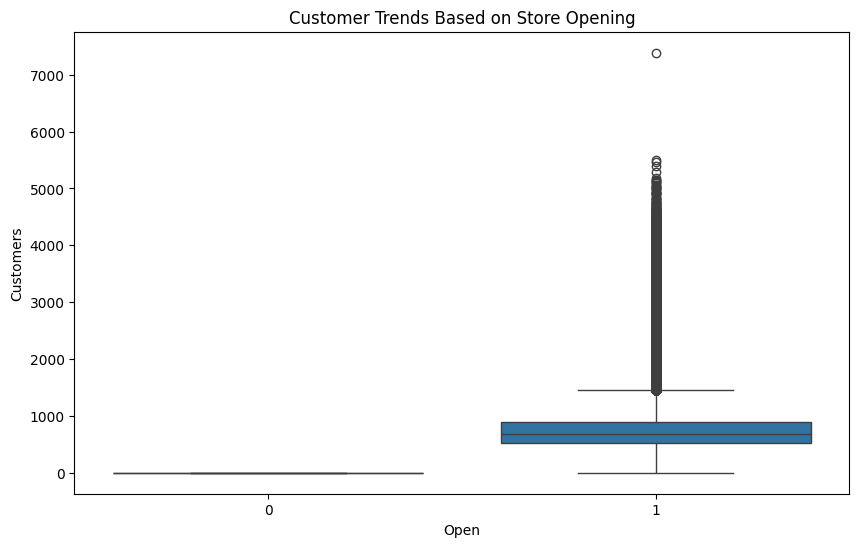

In [24]:
logging.info('Analyzing customer trends during store opening and closing times...')

# Check sales and customer count based on store opening times
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Open', y='Customers')
plt.title('Customer Trends Based on Store Opening')
plt.show()

logging.info('Customer trends during store opening times visualized.')


### Stores Open on All Weekdays and Weekend Sales Impact
Explore which stores are open all weekdays and the effect on weekend sales.

In [1]:
logging.info('Checking which stores are open on all weekdays...')

# Stores open all weekdays
weekdays_open = train_df.groupby('StoreType')['DayOfWeek'].nunique()
stores_open_all_weekdays = weekdays_open[weekdays_open == 6].index

# Filter data for those stores
weekend_sales = train_df[(train_df['StoreType'].isin(stores_open_all_weekdays)) & (train_df['DayOfWeek'] >= 5)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=weekend_sales, x='DayOfWeek', y='Sales')
plt.title('Weekend Sales for Stores Open on All Weekdays')
plt.show()

logging.info('Weekend sales for stores open all weekdays visualized.')


NameError: name 'logging' is not defined

### Effect of Assortment Type on Sales
Investigate how the assortment type affects sales.

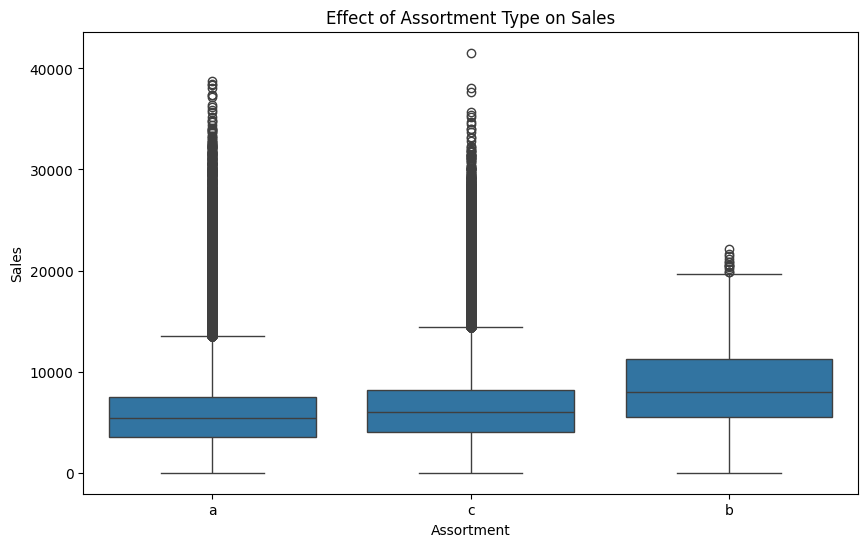

In [26]:
logging.info('Analyzing how assortment type affects sales...')

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Assortment', y='Sales')
plt.title('Effect of Assortment Type on Sales')
plt.show()

logging.info('Effect of assortment type on sales visualized.')


### Competitor Distance and Sales
Explore how the distance to the next competitor affects sales.

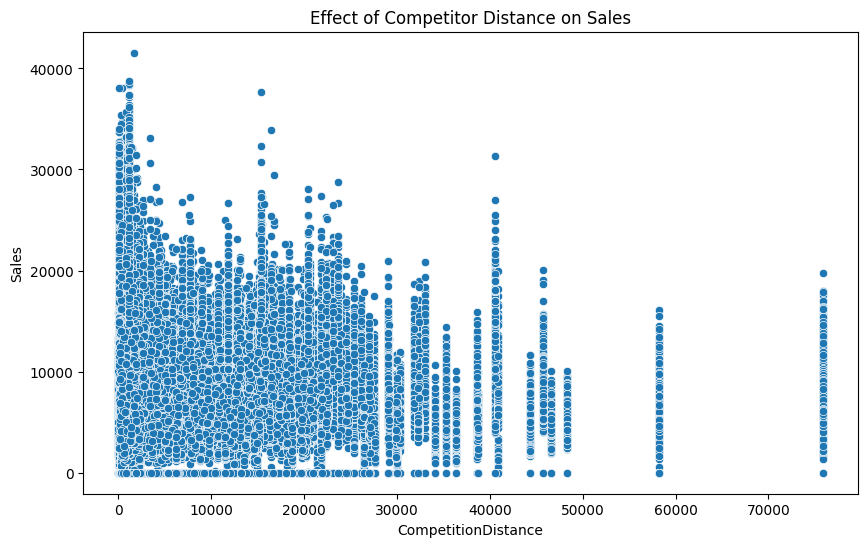

In [27]:
logging.info('Analyzing how competitor distance affects sales...')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='CompetitionDistance', y='Sales')
plt.title('Effect of Competitor Distance on Sales')
plt.show()

logging.info('Effect of competitor distance on sales visualized.')
